## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [2]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Let's explore the dataset a little bit

In [3]:
# Load the data, shuffled and split between train and test sets (x_train and y_rain)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train[0].shape

(28, 28)

In [5]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# What is the corresponding label in the training set?
y_train[333]

8

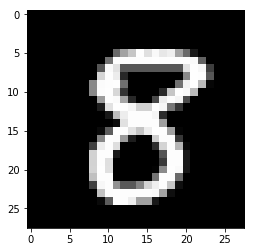

In [7]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [8]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [9]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [10]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [11]:
# We will build a model with two hidden layers of size 64
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
## Note that this model has a LOT of parameters
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [14]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.5123 - acc: 0.8484 - val_loss: 0.2117 - val_acc: 0.9369
Epoch 2/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.2467 - acc: 0.9285 - val_loss: 0.1557 - val_acc: 0.9532
Epoch 3/30
60000/60000 [==============================] - 1s 18us/step - loss: 0.1994 - acc: 0.9409 - val_loss: 0.1273 - val_acc: 0.9613
Epoch 4/30
60000/60000 [==============================] - 1s 18us/step - loss: 0.1698 - acc: 0.9503 - val_loss: 0.1151 - val_acc: 0.9661
Epoch 5/30
60000/60000 [==============================] - 1s 18us/step - loss: 0.1529 - acc: 0.9557 - val_loss: 0.1059 - val_acc: 0.9685
Epoch 6/30
60000/60000 [==============================] - 1s 18us/step - loss: 0.1384 - acc: 0.9589 - val_loss: 0.1070 - val_acc: 0.9703
Epoch 7/30
60000/60000 [==============================] - 1s 18us/step - loss: 0

In [15]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10819254868056233
Test accuracy: 0.9762


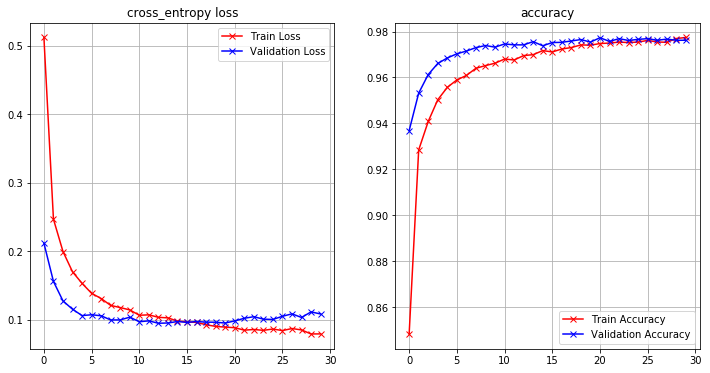

In [16]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [17]:
### Build your model here

# Model 2 has two hidden layers of sizes 400 and 300 respectively
# Fully connected inputs at each layer
# It will use dropout of .4 to help regularize
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

In [18]:
# Summary of model 2
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               120300    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3010      
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


In [19]:
# We will now compile model 2
learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

In [20]:
# The final step is to fit the model

batch_size = 128  # mini-batch with 128 examples
epochs = 20       # run the model for 20 epochs
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.3289 - acc: 0.9005 - val_loss: 0.1326 - val_acc: 0.9571
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1551 - acc: 0.9539 - val_loss: 0.0904 - val_acc: 0.9728
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1183 - acc: 0.9658 - val_loss: 0.0817 - val_acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.1042 - acc: 0.9698 - val_loss: 0.0838 - val_acc: 0.9743
Epoch 5/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0928 - acc: 0.9732 - val_loss: 0.0728 - val_acc: 0.9793
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0831 - acc: 0.9759 - val_loss: 0.0770 - val_acc: 0.9800
Epoch 7/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0779 - acc: 0.9768 - val_loss: 0.0793 - val_acc

## SOLUTION

In [21]:
## We will again use Keras to evaluate the performance of our model 2 on the test set
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09645749624104888
Test accuracy: 0.9836


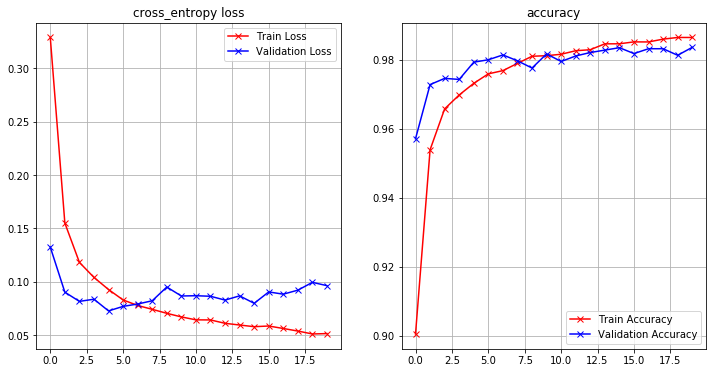

In [22]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

#### My answer: Model 1 vs Model 2

1) model_2 has a total of **437,310** parameters, while model_1 only had **55,050** parameters. This means that model_2 has nearly **8 times** the parameters than model_1.

2) Also, model_2 outperformed model_1 on the test set. The accuracy for model_1 was **97.62%** while that of model_2 was **98.28%**.

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?

#### My answers:

1) As mentioned above, model_2 outperformed model_1 on the test set by yielding a smaller loss and a better accuracy. I would prefer model_1. If I was going into production, I would have chosen *model_1* because it has significantly **lesser parameters**, and the accuracy is comparable to *model_2*. Had the difference in the accuracy been major, I would have gone with *model_2*, but in this case, it is only **0.74%**.

2) Discussion:

- **LOSS:** The trajectories of the training loss for both the models are very comparable but *model_2* reaches a smaller loss in lesser number of epochs. The validation loss for *model_1* smoothly hits a minima and then starts to increase. This also happens in *model_2* but is more exaggerated. The exaggeration could be attributed to overfitting. 
    
    
- **ACCURACY:** Like the loss, the training accuracies of both the models increase smoothly indicating learning. But the validation accuracy for *model_1* plateaus after a certain point, which shows a **saturation** in the model. On the other hand, *model_2* shows **overfitting** due to the gap between the training and validation accuracy after around 10 epochs. 

    
- I think it is more meaningful to use ***accuracy*** to compare performance since the most important goal of out model is to reduce overfitting, or the gap between the training and validation accuracy. 
    
3) We can use regularization. In my experiments below, following obervations were made:

- **Learning Rate**: I tried to compile model_1 with a smaller learning rate (lr = 0.0001) and it perfomed very poorly, giving a test accuracy of **8.92%** and loss of **14.68**. 


- **Regularization**: In the next experiment, I created my own model with *L2 regularization* in each layer, and it performed similar to model_1, giving an accuracy of **96.78%** and a loss of **0.14**. Although, the best accuracy so far is still achieved by model_2, but model_3 performs the most consistently.


In [30]:
# We will now compile model 1 with a smaller learning rate
learning_rate = .0001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

# Fitting the model again
batch_size = 128  # mini-batch with 128 examples
epochs = 30       # run the model for 30 epochs
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 24us/step - loss: 14.6618 - acc: 0.0904 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 2/30
60000/60000 [==============================] - 1s 21us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 3/30
60000/60000 [==============================] - 1s 21us/step - loss: 14.6618 - acc: 0.0904 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 4/30
60000/60000 [==============================] - 1s 19us/step - loss: 14.6618 - acc: 0.0904 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 5/30
60000/60000 [==============================] - 1s 20us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 6/30
60000/60000 [==============================] - 1s 20us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 7/30
60000/60000 [==============================] - 1s 19us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.

In [31]:
## We will again use Keras to evaluate the performance of our model 2 on the test set
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 14.680361064147949
Test accuracy: 0.0892


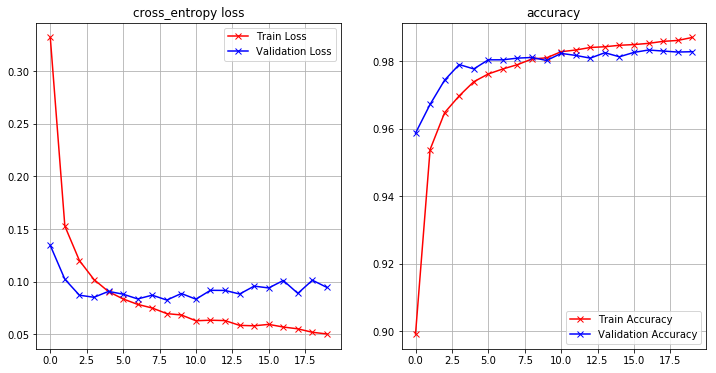

In [24]:
plot_loss_accuracy(history)

In [26]:
# We will now build a completely new model structure
model_3 = Sequential()

# Model 3 has two hidden layers of sizes 400 and 300 respectively
# Fully connected inputs at each layer
# It will use dropout of .5 to help regularize
# We also use individual layer L2 regularization and it helps in gaining performance
model_3.add(Dense(64, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.0001)))
model_3.add(Dropout(0.5))
model_3.add(Dense(16, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.0001)))
model_2.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

# Model architecture and summary
model_3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [27]:
# We will now compile model 1 with a smaller learning rate
learning_rate = 1e-3
model_3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

In [28]:
# Fitting the model again
batch_size = 128  # mini-batch with 128 examples
epochs = 30      
history = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.7535 - acc: 0.7753 - val_loss: 0.2947 - val_acc: 0.9196
Epoch 2/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.4124 - acc: 0.8834 - val_loss: 0.2388 - val_acc: 0.9344
Epoch 3/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.3603 - acc: 0.8981 - val_loss: 0.2141 - val_acc: 0.9424
Epoch 4/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.3326 - acc: 0.9071 - val_loss: 0.1937 - val_acc: 0.9480
Epoch 5/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.3186 - acc: 0.9120 - val_loss: 0.1855 - val_acc: 0.9494
Epoch 6/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.3037 - acc: 0.9157 - val_loss: 0.1752 - val_acc: 0.9543
Epoch 7/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.2974 - acc: 0.9177 - val_loss: 0.1690 - val_acc

Test loss: 0.1409323357641697
Test accuracy: 0.9678


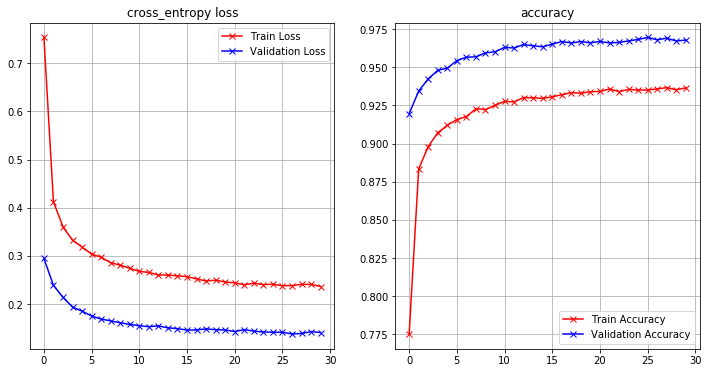

In [29]:
## We will again use Keras to evaluate the performance of our model 2 on the test set
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_loss_accuracy(history)